In [40]:
# Imports 

import warnings
warnings.filterwarnings('ignore')

# Data handling
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Image processing
import cv2

# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Evaluation

Displaying row 1


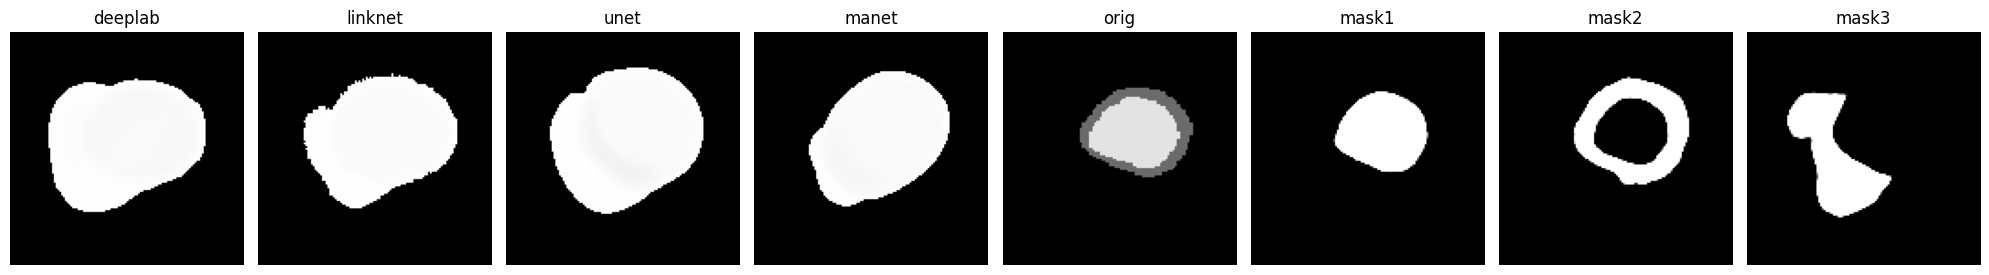

Displaying row 2


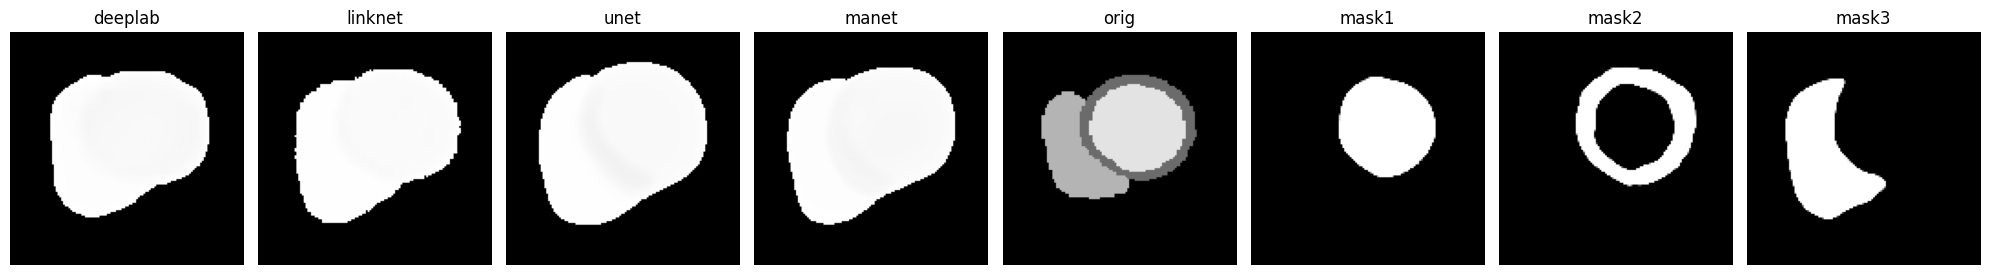

Displaying row 3


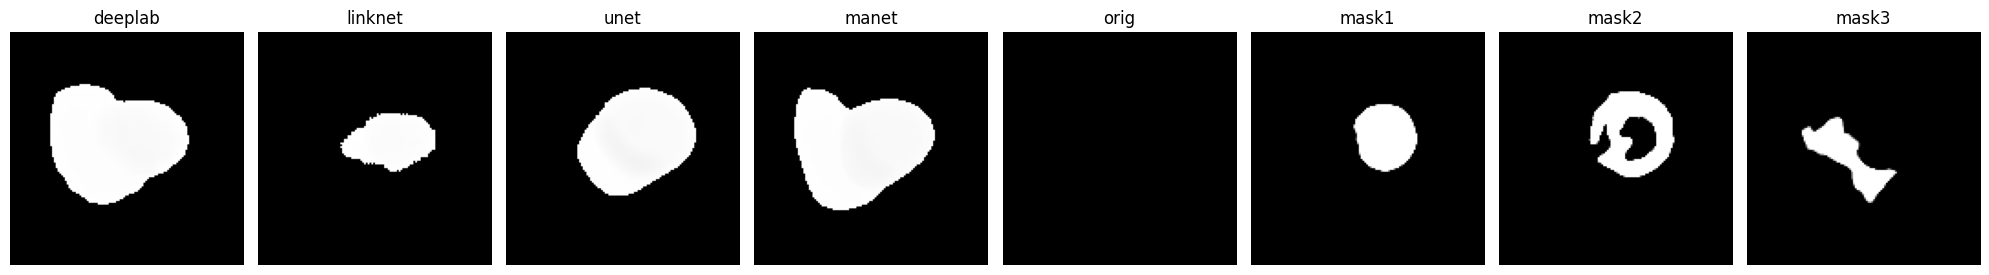

Displaying row 4


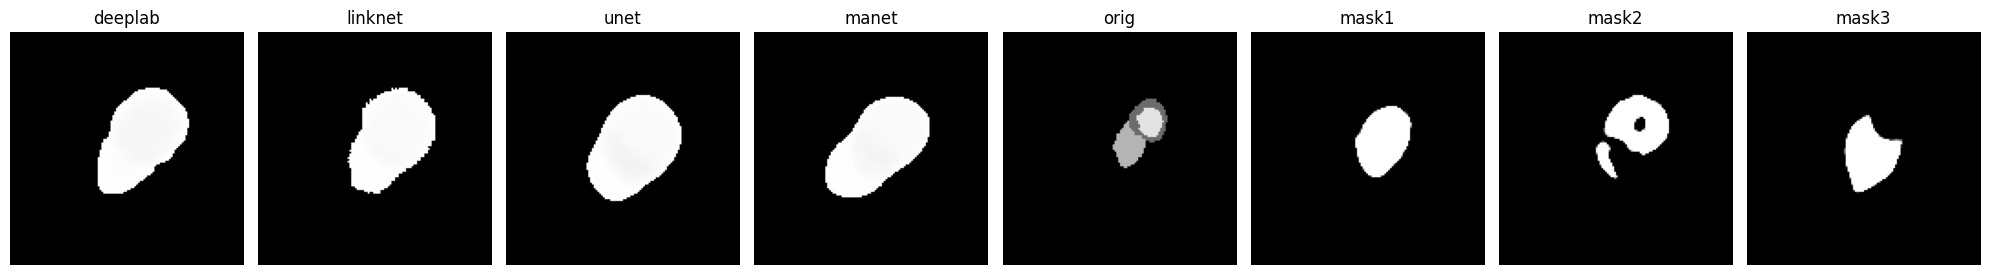

Displaying row 5


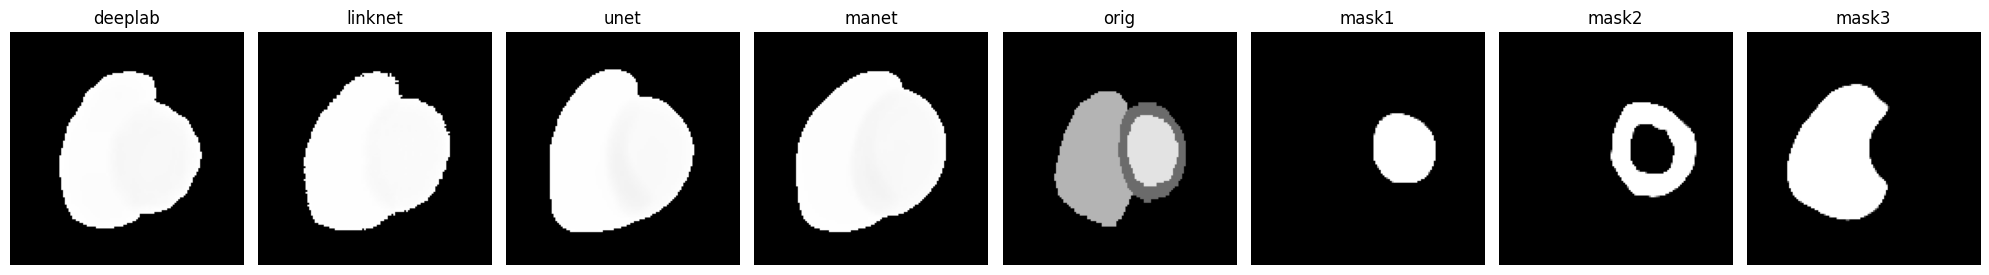

In [5]:


# -------------------------------
# Load CSV Data
# -------------------------------

csv_path = 'D:/deep_larning/output_img.csv'
df = pd.read_csv(csv_path)

def show_images_from_row(row, titles):
    """
    Displays images from a single row of paths in subplots.

    Parameters:
        - row (pd.Series): A single row of the DataFrame containing image paths.
        - titles (list): Titles for each subplot corresponding to the columns.
    """
    num_images = len(row)
    plt.figure(figsize=(20, 5))  # Adjust the figure size as needed

    for idx, img_path in enumerate(row):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_images, idx + 1)
        plt.imshow(img* (1 if idx > 4 else 255), cmap='gray')
        plt.title(titles[idx])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

titles = df.columns.tolist()
for i in range(5):
    print(f"Displaying row {i + 1}")
    show_images_from_row(df.iloc[i], titles)


## Thresholding based on F1 score

Average Best Thresholds for Each Image Type (excluding 'orig'):

deeplab: 5.31

linknet: 3.33

unet: 6.87

manet: 5.36

mask1: 156.86

mask2: 253.20

Displaying thresholded images for row 1


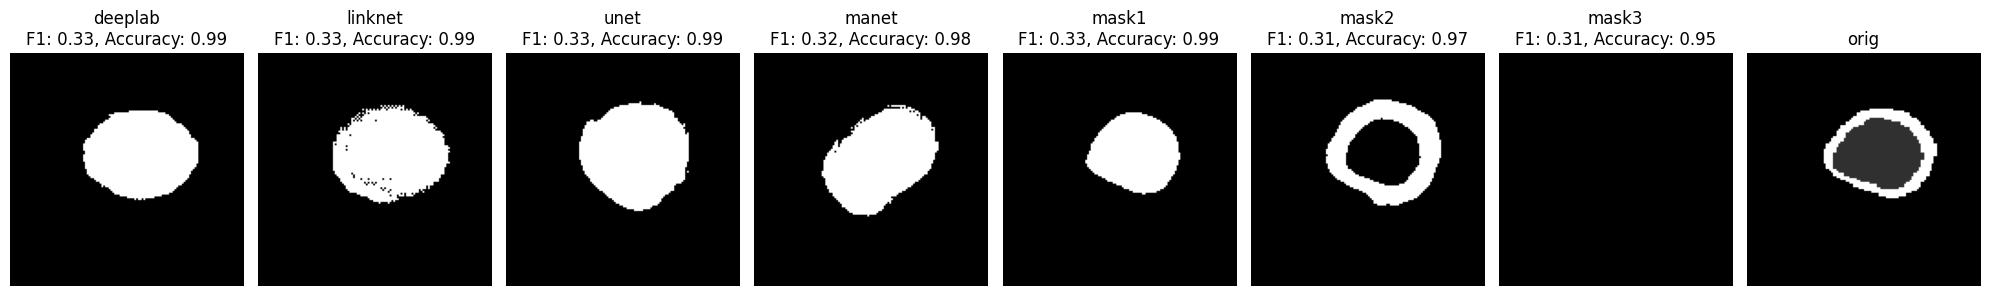

Displaying thresholded images for row 2


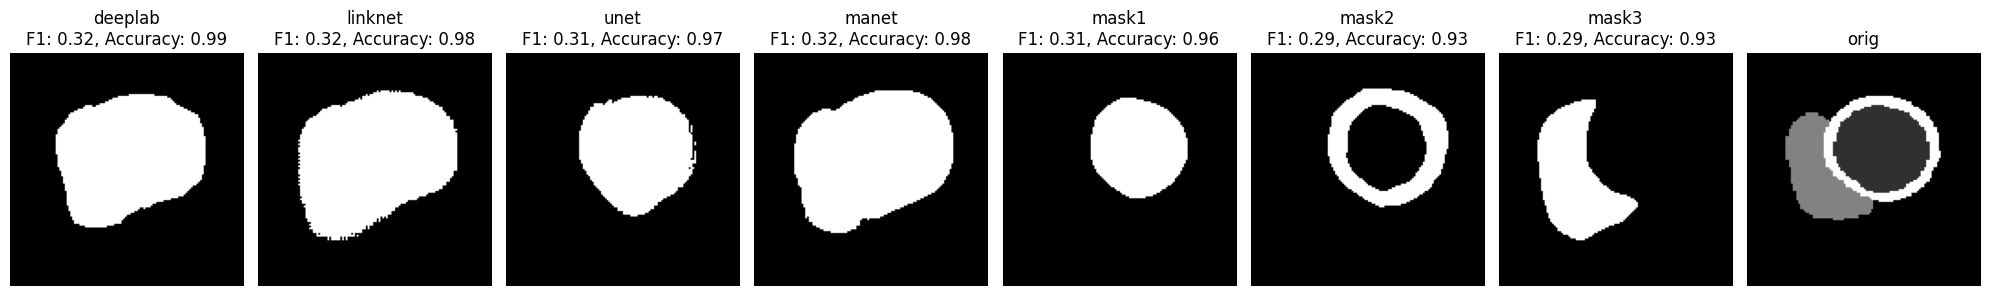

Displaying thresholded images for row 3


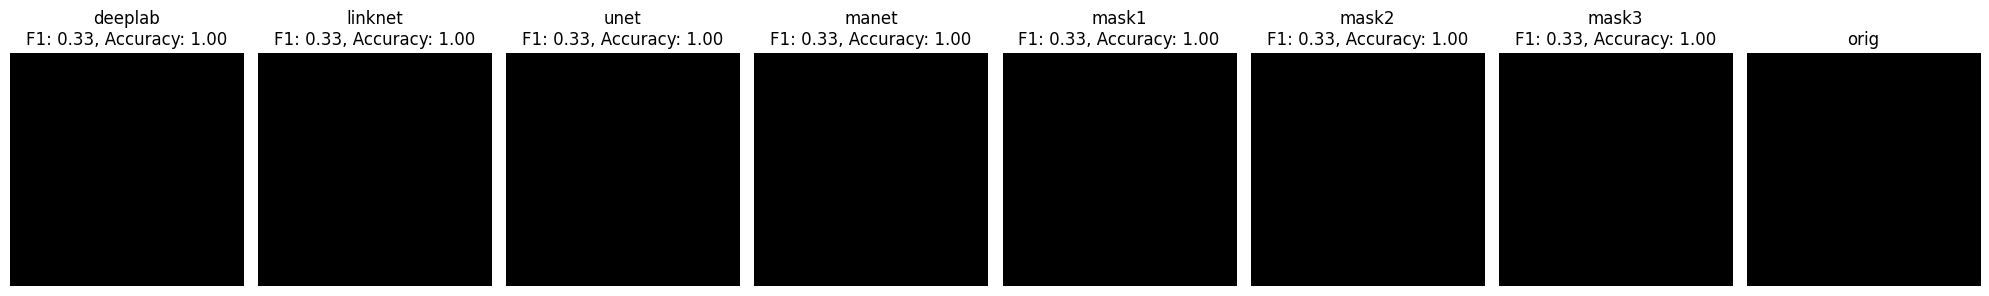

Displaying thresholded images for row 4


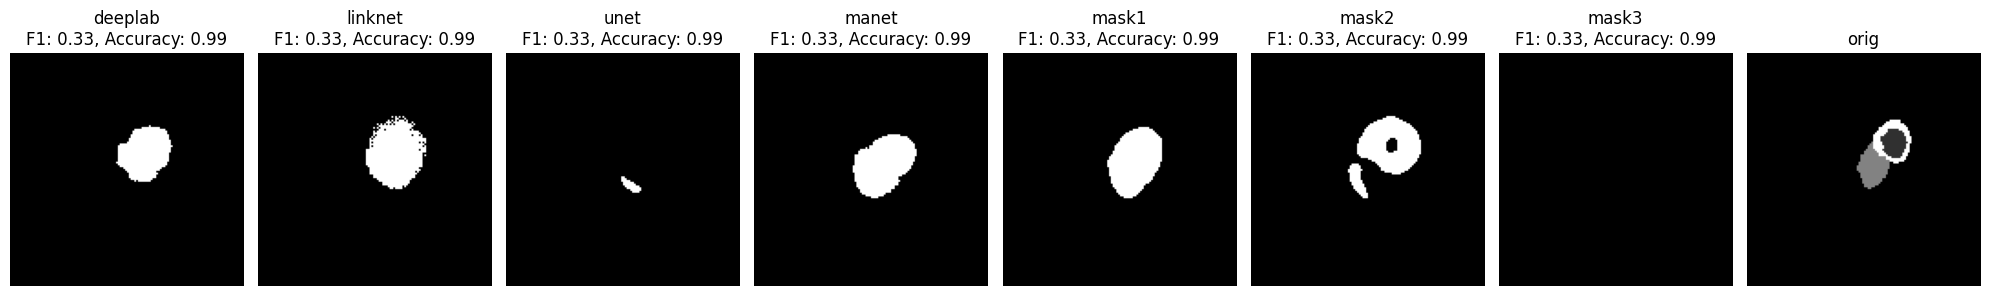

Displaying thresholded images for row 5


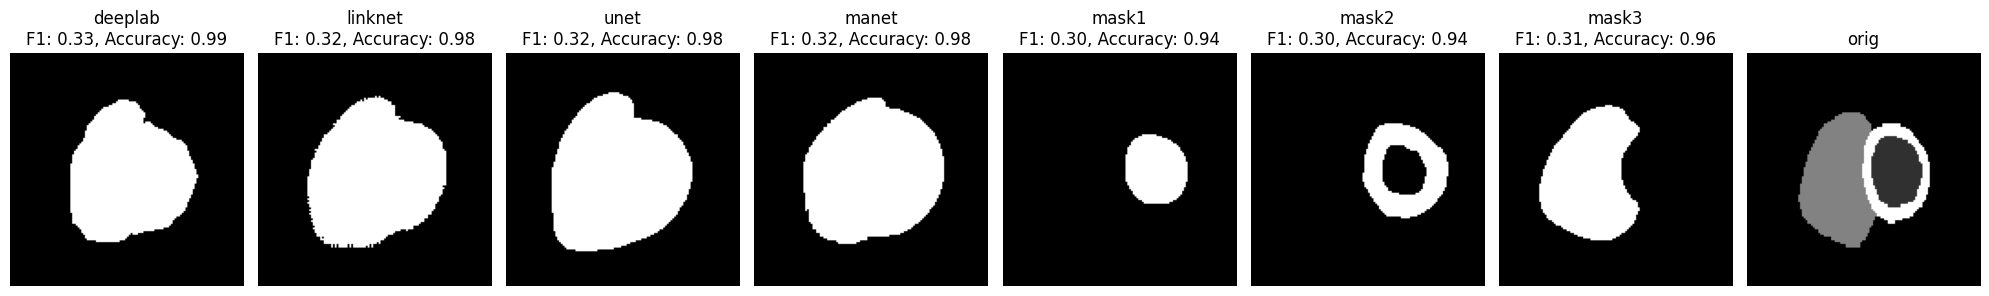

Displaying thresholded images for row 6


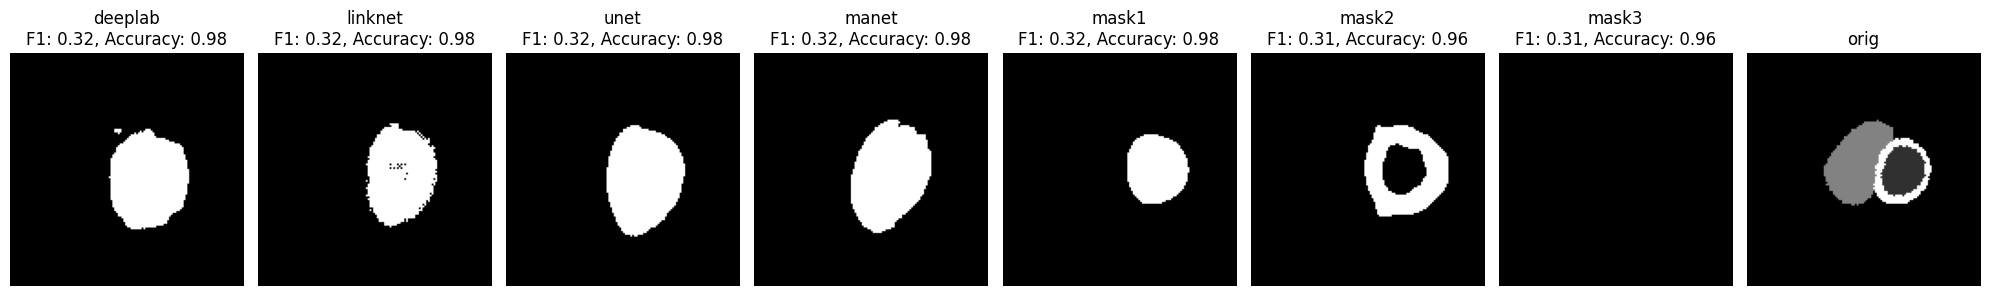

Displaying thresholded images for row 7


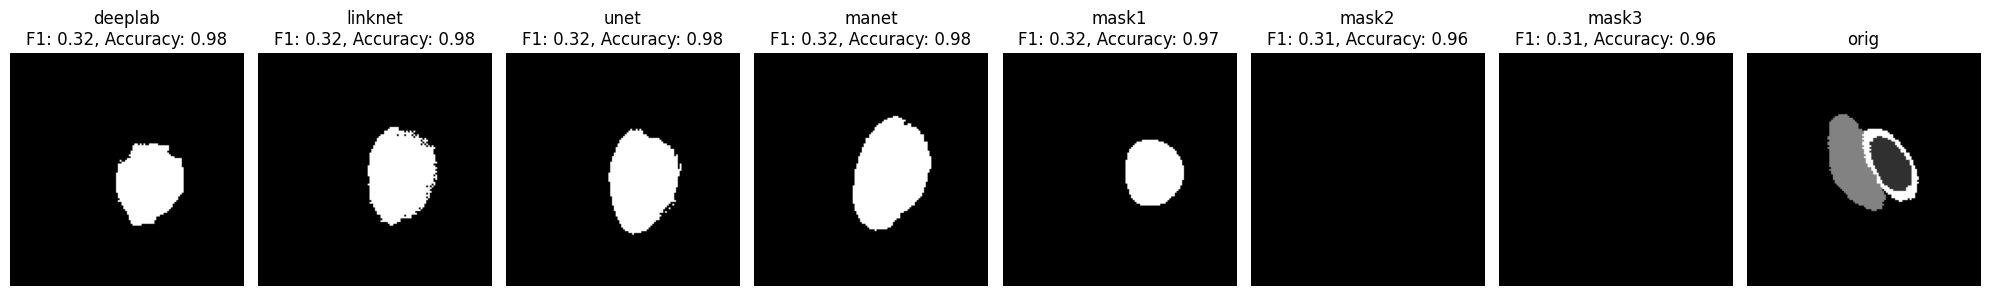

Displaying thresholded images for row 8


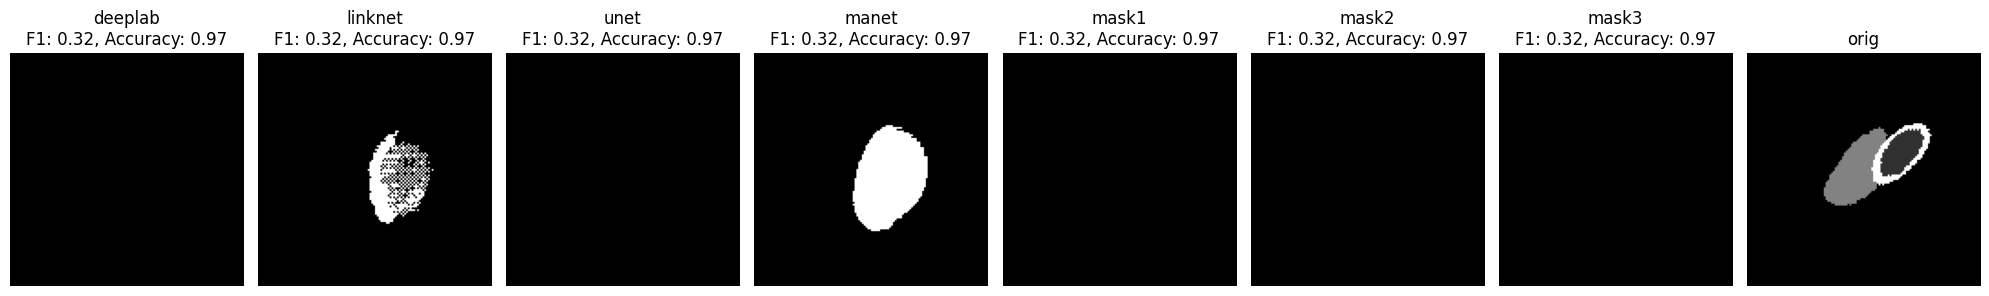

Displaying thresholded images for row 9


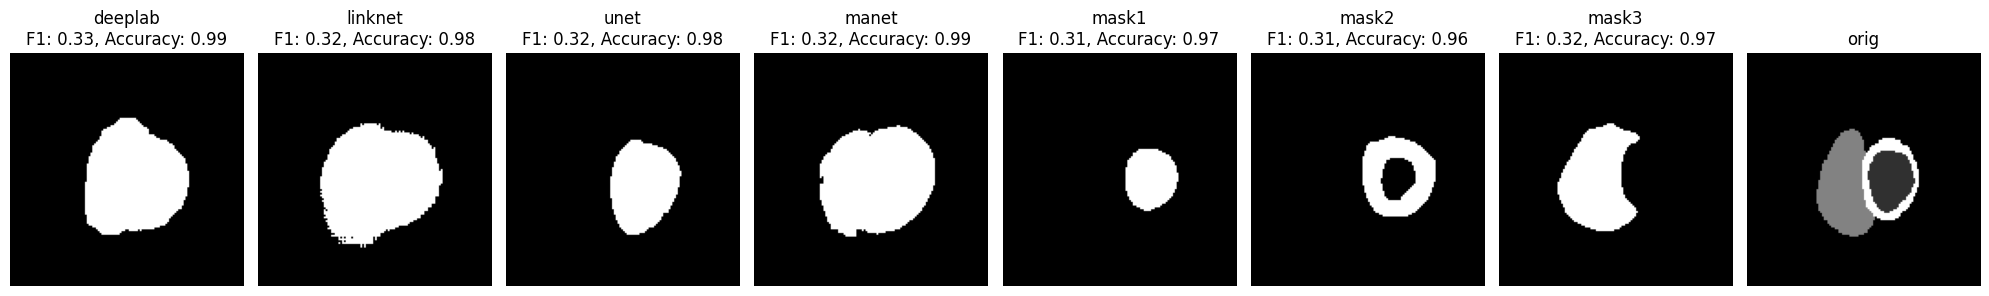

Displaying thresholded images for row 10


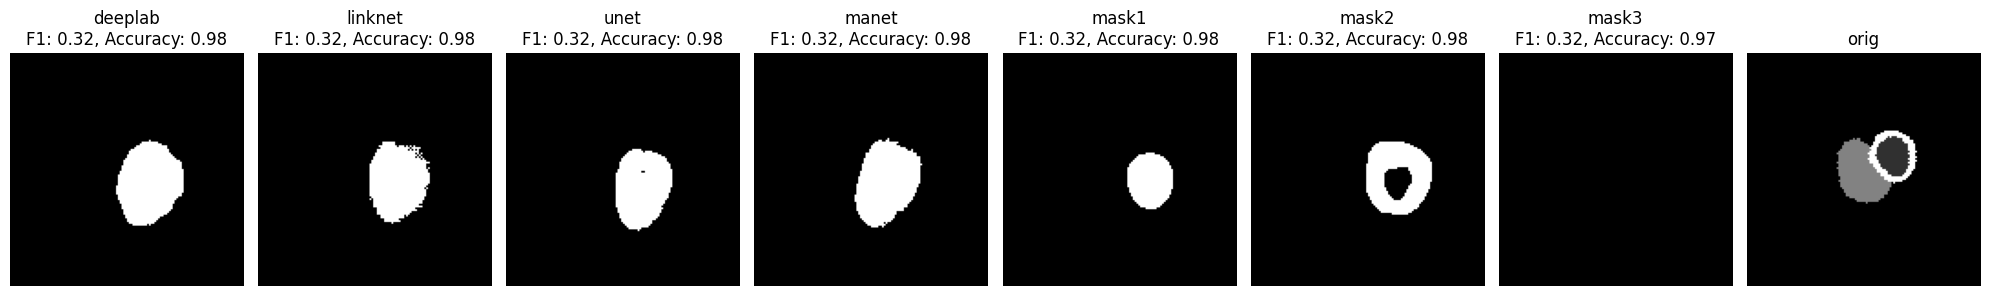


Average Best Thresholds for Each Image Type (excluding 'orig'):
deeplab: 5.31
linknet: 3.33
unet: 6.87
manet: 5.36
mask1: 156.86
mask2: 253.20

Average F1 Score across all rows: 0.32
Average Accuracy Score across all rows: 0.98


In [39]:
def calculate_precision_recall_f1_accuracy_multi_class(y_true, y_pred, num_classes=3):
    """
    Calculates precision, recall, F1 score, and accuracy for multi-class segmentation.

    Parameters:
        - y_true (np.array): Ground truth segmentation mask with multi-class values.
        - y_pred (np.array): Predicted segmentation mask with multi-class values.
        - num_classes (int): The number of classes (including background).

    Returns:
        - precision (float): Precision score (macro-average).
        - recall (float): Recall score (macro-average).
        - f1 (float): F1 score (macro-average).
        - accuracy (float): Accuracy score (macro-average).
    """
    precision_values = []
    recall_values = []
    f1_values = []
    accuracy_values = []

    for class_id in range(num_classes):
        # Create binary masks for each class
        y_true_bin = (y_true == class_id).astype(int)
        y_pred_bin = (y_pred == class_id).astype(int)

        # Calculate precision, recall, F1, and accuracy for each class
        precision = precision_score(y_true_bin.flatten(), y_pred_bin.flatten())
        recall = recall_score(y_true_bin.flatten(), y_pred_bin.flatten())
        f1 = f1_score(y_true_bin.flatten(), y_pred_bin.flatten())
        accuracy = accuracy_score(y_true_bin.flatten(), y_pred_bin.flatten())

        precision_values.append(precision)
        recall_values.append(recall)
        f1_values.append(f1)
        accuracy_values.append(accuracy)

    # Return macro-average of precision, recall, F1, and accuracy
    return np.mean(precision_values), np.mean(recall_values), np.mean(f1_values), np.mean(accuracy_values)

# -------------------------------
# Function to Perform Thresholding and Metric Calculation
# -------------------------------

def show_best_threshold_from_row(row, titles, best_thresholds_list):
    """
    Displays the thresholded images and their corresponding precision, recall, F1 scores,
    and accuracy in a structured row of subplots, with the original image at the end.
    Also, gathers the best thresholds for each image type.

    Parameters:
        - row (pd.Series): A single row of the DataFrame containing image paths.
        - titles (list): Titles for each subplot corresponding to the columns.
        - best_thresholds_list (list): List to store the best thresholds for all input images.
    """
    num_images = len(row)
    images = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) for img_path in row]
    
    # The 'orig' image is the ground truth (assuming it's the 5th column)
    orig_image = images[4]
    orig_title = titles[4]

    # Titles and images to threshold (excluding the 'orig' image)
    images_to_threshold = images[:4] + images[5:]
    titles_to_threshold = titles[:4] + titles[5:]

    best_thresholds = []
    f1_scores_per_row = []
    accuracy_scores_per_row = []

    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))  # Create a row of subplots

    # Perform thresholding for each image individually
    for img_idx, img in enumerate(images_to_threshold):
        min_val, max_val = np.min(img), np.max(img)
        thresholds = np.linspace(min_val, max_val, 100)

        # Arrays to store precision, recall, F1 scores, and accuracy for each threshold
        precision_values = []
        recall_values = []
        f1_values = []
        accuracy_values = []

        # Loop over thresholds
        for threshold in thresholds:
            # Apply thresholding
            _, thresholded_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

            # Calculate precision, recall, F1 score, and accuracy
            precision, recall, f1, accuracy = calculate_precision_recall_f1_accuracy_multi_class(orig_image, thresholded_img)

            precision_values.append(precision)
            recall_values.append(recall)
            f1_values.append(f1)
            accuracy_values.append(accuracy)

        # Find the threshold with the highest F1 score
        best_f1_idx = np.argmax(f1_values)
        best_threshold = thresholds[best_f1_idx]
        best_f1 = f1_values[best_f1_idx]
        best_accuracy = accuracy_values[best_f1_idx]

        # Store the best threshold for plotting
        best_thresholds.append(best_threshold)
        f1_scores_per_row.append(best_f1)
        accuracy_scores_per_row.append(best_accuracy)

        # Apply the best threshold
        _, best_thresholded_img = cv2.threshold(img, best_threshold, 255, cv2.THRESH_BINARY)

        # Plot the thresholded image
        axes[img_idx].imshow(best_thresholded_img, cmap='gray')
        axes[img_idx].set_title(f"{titles_to_threshold[img_idx]}\nF1: {best_f1:.2f}, Accuracy: {best_accuracy:.2f}")
        axes[img_idx].axis('off')

    # Plot the original image at the last position (for comparison)
    axes[-1].imshow(orig_image, cmap='gray')
    axes[-1].set_title(f"{orig_title}")
    axes[-1].axis('off')

    plt.tight_layout()
    plt.show()

    # Append the best thresholds for this row to the list
    best_thresholds_list.append(best_thresholds)

    return f1_scores_per_row, accuracy_scores_per_row

# -------------------------------
# Function to Calculate Average Best Thresholds, F1 Scores, and Accuracy Scores
# -------------------------------

def calculate_average_best_thresholds_f1_accuracy(best_thresholds_list, all_f1_scores, all_accuracy_scores):
    """
    Calculates the average best threshold for each image type (across all rows),
    and the average F1 score and accuracy score across all rows.

    Parameters:
        - best_thresholds_list (list): A list containing the best thresholds for all rows.
        - all_f1_scores (list): A list containing the best F1 scores for all rows.
        - all_accuracy_scores (list): A list containing the best accuracy scores for all rows.

    Returns:
        - average_best_thresholds (list): The average best thresholds for each image type.
        - average_f1_score (float): The average F1 score across all rows.
        - average_accuracy_score (float): The average accuracy score across all rows.
    """
    # Transpose the list to get best thresholds for each image type (e.g., deeplab, linknet, etc.)
    best_thresholds_array = np.array(best_thresholds_list)
    average_best_thresholds = np.mean(best_thresholds_array, axis=0)

    # Calculate the overall average F1 score and accuracy score across all rows
    average_f1_score = np.mean(all_f1_scores)
    average_accuracy_score = np.mean(all_accuracy_scores)

    return average_best_thresholds, average_f1_score, average_accuracy_score

# -------------------------------
# Display Best Thresholded Images for the First Few Rows and Calculate Average Thresholds, F1, and Accuracy
# -------------------------------

titles = df.columns.tolist()

# List to store best thresholds for all rows, F1 scores, and accuracy scores
best_thresholds_list = []
all_f1_scores = []
all_accuracy_scores = []

for i in range(10):  # Display for the first 10 rows
    print(f"Displaying thresholded images for row {i + 1}")
    f1_scores_for_row, accuracy_scores_for_row = show_best_threshold_from_row(df.iloc[i], titles, best_thresholds_list)
    all_f1_scores.extend(f1_scores_for_row)
    all_accuracy_scores.extend(accuracy_scores_for_row)

# Calculate and print the average best thresholds for each image type, the average F1 score, and accuracy score
average_best_thresholds, average_f1_score, average_accuracy_score = calculate_average_best_thresholds_f1_accuracy(
    best_thresholds_list, all_f1_scores, all_accuracy_scores)

print("\nAverage Best Thresholds for Each Image Type (excluding 'orig'):")
for i, avg_threshold in enumerate(average_best_thresholds):
    if titles[i] != "orig":
        print(f"{titles[i]}: {avg_threshold:.2f}")

print(f"\nAverage F1 Score across all rows: {average_f1_score:.2f}")
print(f"Average Accuracy Score across all rows: {average_accuracy_score:.2f}")
